In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from matplotlib._png import read_png
import pandas as pd
import numpy as np
import os

cwd = os.getcwd()
 
data_raw = pd.read_excel('specs_airplane.xlsx', index_col='Type').to_dict()
data_raw.keys()

dict_keys(['172SP', 'Citation III', 'Turbo Arrow III', 'Challenger 601', 'Falcon 200', 'Hawker 800', 'SR22', 'T182T', 'B36 Bonanza', 'HondaJet', 'DA42'])

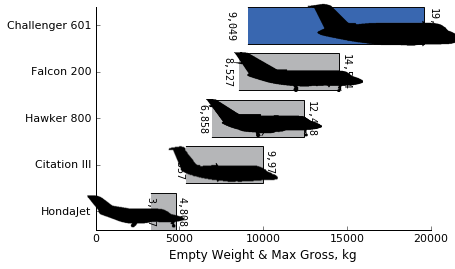

In [2]:
def plot_bar_comparison(names, ac_idx, colors, plt_name):
    '''
    names - list; each entry is a string with the aircraft name
    ac_idx - position in 'names' for the desired aircraft to highlight
    colors - list of hex color strings
    plt_name - string
    '''
    # configure axes
    fig = plt.gcf()
    fig.clf()
    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False) # below lines remove top/right axes
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
 
   # plot bars
    y_pos = np.arange(len(names))
    plt.barh(y_pos, data, align='center', alpha=.95, color=colors)
    plt.yticks(y_pos, names, size='11')
    plt.xticks(size='11')
 
    plt.xlabel(plt_name, size='larger')
 
    # weight plots include empty and max gross
    if plt_name == 'Max Gross, kg':
        plt.barh(y_pos, empty, align='center', alpha=1, color='white',edgecolor='white')
        plt.xlabel('Empty Weight & Max Gross, kg')
 
    # function to plot aircraft images at the end of each corresponding bar
    def plot_ac(x, y, path, zoom):
        arr_hand = read_png(path)
        imagebox = OffsetImage(arr_hand, zoom=zoom)
        xy = [x, y]
        ab = AnnotationBbox(imagebox, xy, xybox=(-40, 0), xycoords='data', boxcoords="offset points", frameon=False)
        ax.add_artist(ab)
 
    # loop over aircraft and call plot_ac function
    zoom = .5  # .5 for jets, .9 for props
    item = 0
    for name in names:
        #path = (cwd + 'views\\' + name + '.png') # for windows environments
        path = (cwd + '/views/' + name + '.png') # for mac environments
        x = data[item]
        y = y_pos[item]
        plot_ac(x, y, path, zoom)
        if x < 50: # round to 2 places if < 50; 0 places if greater
            plt.text(x*1.01, y, '{0:,}'.format((round(x,1))),family='monospace',va='center',rotation=-90) # add text data label
        else:
            plt.text(x*1.01, y, '{0:,}'.format((int(x))),family='monospace',va='center',rotation=-90) # add text data label
        if plt_name == 'Max Gross, kg':
            plt.text(empty[item]-x*.065, y, '{0:,}'.format((int(empty[item]))),family='monospace',va='center',rotation=-90) # add empty weight text data label
        item+=1
 
    # save & show plot
    plt.draw()
    #plt.savefig(cwd + '\\charts\\' + names[ac_idx] + '-' + plt_name.replace("/","-") + '.png', dpi=150) # for windows environments
    plt.savefig(cwd + '/charts/' + names[ac_idx] + '-' + plt_name.replace("/","-") + '.png', dpi=150) # for mac environments
    #plt.show()
 
# USER INPUTS--------------------------------------------
category = 'Jet'
plt_names = ['Cruise Speed, kts','Service Ceiling, m','Range, nm','Max Gross, kg']
 
color_highlight = '#2e5fac'
color_background = '#b1b2b4'
# -------------------------------------------------------
 
# speicify types by category
if category=='Prop':
    names  = ['172SP', 'Turbo Arrow III', 'T182T', 'SR22', 'B36 Bonanza', 'DA42']
elif category == 'Jet':
    names = ['HondaJet','Citation III', 'Hawker 800', 'Falcon 200', 'Challenger 601']
else:
    names = ['172SP', 'Turbo Arrow III', 'T182T', 'SR22', 'B36 Bonanza', 'DA42',
            'HondaJet','Citation III', 'Hawker 800', 'Falcon 200', 'Challenger 601']
 
# loop over the desired specs to plot
for plt_name in plt_names:
    # extract relevant data
    data  = np.empty(len(names))
    empty = np.empty(len(names))
    item  = 0
    for name in names:
        data[item] = (data_raw[name][plt_name])
        empty[item] = (data_raw[name]['Empty Weight, kg'])
        item+=1
 
    # loop over names and pass parameters to plot_bar_comparison to generate plot
    for ac_idx in range(0,len(names)):
        colors = [color_background] * len(names)
        colors[ac_idx] = color_highlight
        plot_bar_comparison(names, ac_idx, colors, plt_name)